![x-files](Thexfiles.jpg)

In [1]:
import requests
import json

In [2]:
api_url = 'http://content.guardianapis.com/#/search?q=ufo'

In [3]:
payload = {
        'api-key':              '25ce3607-2201-4dac-9ccb-d887c3784d5e',
        'page-size':            200,
        'show-editors-picks':   'true',
        'show-elements':        'image',
        'show-fields':          'all'

}

In [4]:
response = requests.get(api_url, params=payload)

In [5]:
data = response.json()

In [6]:
data

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'editorsPicks': []}}

In [7]:
response.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'editorsPicks': []}}

In [8]:
url = 'https://content.guardianapis.com/search'
payload = {'order-by': 'oldest', 'q': 'UFO', 'api-key': '25ce3607-2201-4dac-9ccb-d887c3784d5e'}

In [9]:
payload['page-size'] = 100
payload['page'] = 1

r = requests.get(url, payload)
j = json.loads(r.text)


N = int(j['response']['pages'])

In [10]:
N

13

In [11]:

all = []


for k in range(N):
    payload['page'] = k + 1
    r = requests.get(url, payload)
    j = json.loads(r.text)
    s = j['response']['results']
    all.extend(s)




In [12]:
len(all)


1218

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(all)

In [15]:
df['webPublicationDate'] = pd.to_datetime(df['webPublicationDate'])

In [16]:
df.sort_values(by = ['webPublicationDate'], ascending=False)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
1217,film/2021/apr/19/cielo-review-atacama-chile-de...,article,film,Film,2021-04-19 13:00:11+00:00,Cielo review – love letter to the desert’s sta...,https://www.theguardian.com/film/2021/apr/19/c...,https://content.guardianapis.com/film/2021/apr...,False,pillar/arts,Arts
1216,world/2021/apr/18/attack-of-the-drones-the-mys...,article,technology,Technology,2021-04-18 10:00:05+00:00,Attack of the drones: the mystery of disappear...,https://www.theguardian.com/world/2021/apr/18/...,https://content.guardianapis.com/world/2021/ap...,False,pillar/news,News
1215,us-news/2021/apr/16/pentagon-ufos-leaked-photo...,article,us-news,US news,2021-04-16 15:41:54+00:00,Pentagon confirms leaked photos and video of U...,https://www.theguardian.com/us-news/2021/apr/1...,https://content.guardianapis.com/us-news/2021/...,False,pillar/news,News
1214,artanddesign/2021/apr/13/pencil-sharpeners-539...,article,artanddesign,Art and design,2021-04-13 05:00:25+00:00,From pencil sharpeners to a $539m lawsuit: how...,https://www.theguardian.com/artanddesign/2021/...,https://content.guardianapis.com/artanddesign/...,False,pillar/arts,Arts
1213,tv-and-radio/2021/apr/10/louis-theroux-i-worry...,article,tv-and-radio,Television & radio,2021-04-10 07:00:02+00:00,Louis Theroux: ‘I worry about not coming up to...,https://www.theguardian.com/tv-and-radio/2021/...,https://content.guardianapis.com/tv-and-radio/...,False,pillar/arts,Arts
...,...,...,...,...,...,...,...,...,...,...,...
4,uk/1999/mar/20/4,article,uk-news,UK news,1999-03-20 04:06:49+00:00,Pity the poor aliens,https://www.theguardian.com/uk/1999/mar/20/4,https://content.guardianapis.com/uk/1999/mar/20/4,False,pillar/news,News
3,society/1999/mar/17/guardiansocietysupplement,article,society,Society,1999-03-17 02:26:08+00:00,Cover stories,https://www.theguardian.com/society/1999/mar/1...,https://content.guardianapis.com/society/1999/...,False,pillar/news,News
2,media/1999/jan/25/tvandradio.television1,article,culture,Culture,1999-01-25 04:17:17+00:00,Watching brief,https://www.theguardian.com/media/1999/jan/25/...,https://content.guardianapis.com/media/1999/ja...,False,pillar/arts,Arts
1,theguardian/1998/dec/31/features11.g2,article,global,Global,1998-12-31 04:21:18+00:00,They came from Kent,https://www.theguardian.com/theguardian/1998/d...,https://content.guardianapis.com/theguardian/1...,False,NaN,NaN


In [17]:
!rm ufo_guardian.db

In [18]:
import sqlite3
conn = sqlite3.connect('ufo_guardian.db')

In [19]:
df.to_sql('ufo_guardian',con = conn)

In [20]:
conn.close()

In [21]:
df.describe(datetime_is_numeric=True)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
count,1218,1218,1218,1218,1218,1218,1218,1218,1218,1189,1189
unique,1218,6,40,40,NaN,1172,1218,1218,1,5,5
top,lifeandstyle/2014/nov/15/i-want-to-complicate-...,article,music,Music,NaN,Clubs picks of the week,https://www.theguardian.com/theguardian/2005/j...,https://content.guardianapis.com/books/2004/ma...,False,pillar/arts,Arts
freq,1,1180,214,214,NaN,27,1,1,1218,540,540
mean,NaN,NaN,NaN,NaN,2010-10-30 14:27:29.582922752+00:00,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1989-06-14 10:26:21+00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2007-01-15 00:07:18.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2010-11-24 22:32:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2015-03-16 07:37:38.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2021-04-19 13:00:11+00:00,NaN,NaN,NaN,NaN,NaN,NaN


https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


In [22]:
df[df['sectionId'] == 'news']

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
27,theguardian/2000/jan/12/correctionsandclarific...,article,news,News,2000-01-12 01:32:02+00:00,Corrections and clarifications,https://www.theguardian.com/theguardian/2000/j...,https://content.guardianapis.com/theguardian/2...,False,pillar/news,News
115,news/2002/may/30/guardianobituaries,article,news,News,2002-05-30 13:41:59+00:00,Obituary: Lord Kimberley,https://www.theguardian.com/news/2002/may/30/g...,https://content.guardianapis.com/news/2002/may...,False,pillar/news,News
193,news/2004/may/20/guardianobituaries1,article,news,News,2004-05-20 01:44:33+00:00,Obituary: Admiral of the Fleet Lord Hill-Norton,https://www.theguardian.com/news/2004/may/20/g...,https://content.guardianapis.com/news/2004/may...,False,pillar/news,News
216,theguardian/2005/jan/31/correctionsandclarific...,article,news,News,2005-01-31 11:04:59+00:00,Corrections and clarifications,https://www.theguardian.com/theguardian/2005/j...,https://content.guardianapis.com/theguardian/2...,False,pillar/news,News
250,news/blog/2005/dec/20/post40,article,news,News,2005-12-20 11:00:04+00:00,"RIP, the man who created Roswell's tourism ind...",https://www.theguardian.com/news/blog/2005/dec...,https://content.guardianapis.com/news/blog/200...,False,pillar/news,News
279,news/observerblog/2006/jul/10/houseparty,article,news,News,2006-07-10 12:00:11+00:00,This old house,https://www.theguardian.com/news/observerblog/...,https://content.guardianapis.com/news/observer...,False,pillar/news,News
492,news/datablog/2009/apr/28/swine-flu-mexico,article,news,News,2009-04-28 12:44:04+00:00,"A little calm about swine flu, please",https://www.theguardian.com/news/datablog/2009...,https://content.guardianapis.com/news/datablog...,False,pillar/news,News
493,news/blog/2009/may/07/northerner-x-files-scarb...,article,news,News,2009-05-07 16:10:12+00:00,The Northerner: The truth is out there (in Yor...,https://www.theguardian.com/news/blog/2009/may...,https://content.guardianapis.com/news/blog/200...,False,pillar/news,News
657,news/2011/jul/13/weatherwatch-flying-saucers,article,news,News,2011-07-13 22:01:01+00:00,Weatherwatch: UFOs or temperature?,https://www.theguardian.com/news/2011/jul/13/w...,https://content.guardianapis.com/news/2011/jul...,False,pillar/news,News
681,news/2011/nov/16/weatherwatch-thunderstorm-met...,article,news,News,2011-11-16 22:30:00+00:00,Weatherwatch: Puzzling phenomena of sky battles,https://www.theguardian.com/news/2011/nov/16/w...,https://content.guardianapis.com/news/2011/nov...,False,pillar/news,News


In [23]:
dn = pd.to_datetime(df['webPublicationDate'])

In [24]:
dn = dn.dt.strftime('%Y')

In [25]:
dn

0       1989
1       1998
2       1999
3       1999
4       1999
        ... 
1213    2021
1214    2021
1215    2021
1216    2021
1217    2021
Name: webPublicationDate, Length: 1218, dtype: object

In [26]:
type(dn)

pandas.core.series.Series

In [27]:
pd.to_datetime(df['webPublicationDate'])[2].year

1999

In [28]:
dp = pd.DataFrame(dn)

In [29]:
dp['количество публикаций'] = 1

In [30]:
dp

,webPublicationDate,количество публикаций
0,1989,1
1,1998,1
2,1999,1
3,1999,1
4,1999,1
...,...,...
1213,2021,1
1214,2021,1
1215,2021,1
1216,2021,1


https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data

https://stackoverflow.com/questions/38621652/pandas-pivot-time-series-by-year

In [31]:
import numpy as np
tb = pd.pivot_table(dp, index='webPublicationDate', values='количество публикаций', aggfunc=np.sum)

In [32]:
tb

,количество публикаций
webPublicationDate,
1989,1
1998,1
1999,25
2000,43
2001,32
2002,41
2003,39
2004,30
2005,41


<AxesSubplot:xlabel='webPublicationDate'>

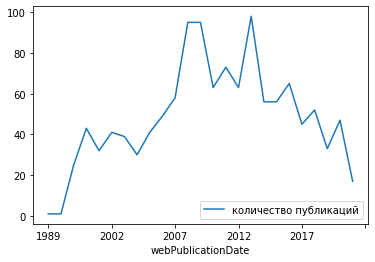

In [33]:
tb.plot()

<AxesSubplot:xlabel='webPublicationDate'>

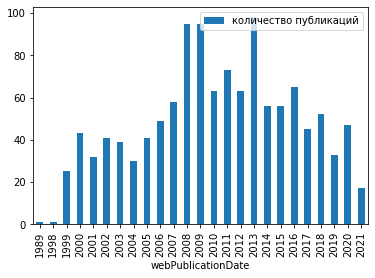

In [34]:
tb.plot.bar()

<AxesSubplot:>

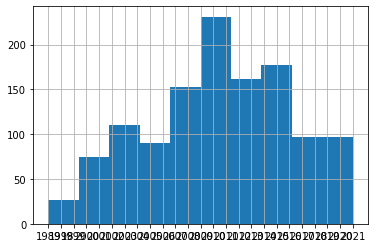

In [35]:
dn.hist()

In [36]:
dp

,webPublicationDate,количество публикаций
0,1989,1
1,1998,1
2,1999,1
3,1999,1
4,1999,1
...,...,...
1213,2021,1
1214,2021,1
1215,2021,1
1216,2021,1
